In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [61]:
from statsmodels.tsa.ar_model import AutoReg, ARResults, ar_select_order

In [3]:
cd ..

/home/dhatri


In [6]:
cd Documents/UDEMY_TSA_FINAL/Data/

/home/dhatri/Documents/UDEMY_TSA_FINAL/Data


In [8]:
df = pd.read_csv('uspopulation.csv', index_col='DATE', parse_dates=True)

In [9]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

<Axes: xlabel='DATE'>

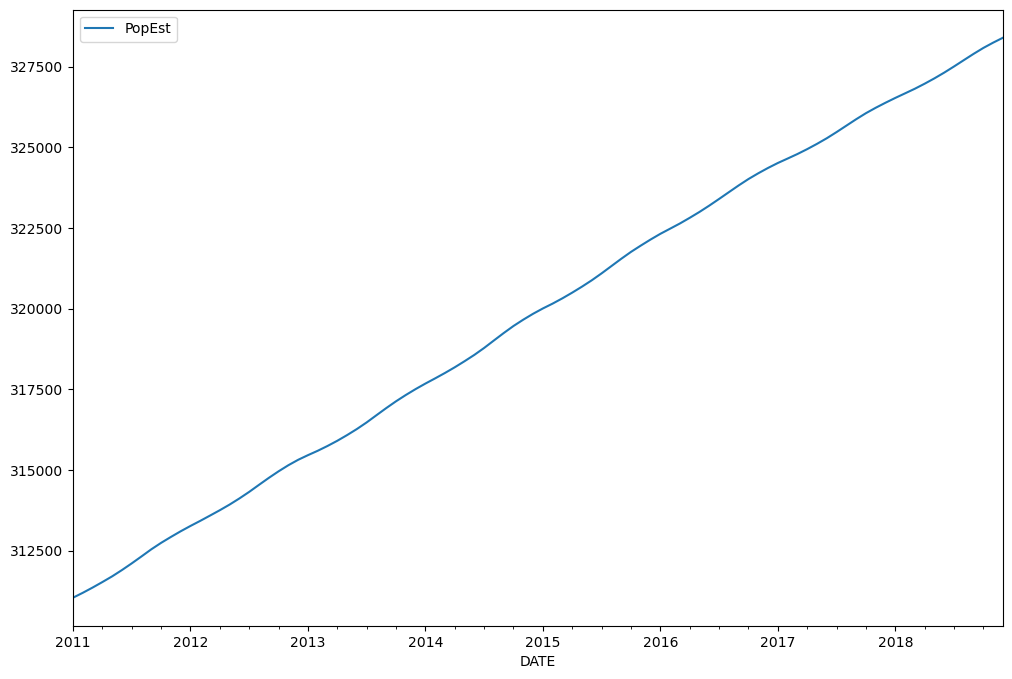

In [13]:
df.plot()

In [14]:
train_data = df.iloc[:84]
test_data = df.iloc[84:]

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
model = AutoReg(train_data['PopEst'], lags=1)

In [24]:
AR1fit = model.fit()

In [28]:
 AR1fit.ar_lags

[1]

In [29]:
AR1fit.params

const        284.913797
PopEst.L1      0.999686
dtype: float64

In [123]:
start = len(train_data)
end = len(train_data) + len(test_data) - 1

In [124]:
AR1fit.predict(start=start, end=end, dynamic=False)

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [125]:
pred1 = AR1fit.predict(start=start, end=end, dynamic=False)

In [126]:
pred1 = pred1.rename('AR(1) Predictions')

In [127]:
pred1

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: AR(1) Predictions, dtype: float64

<Axes: xlabel='DATE'>

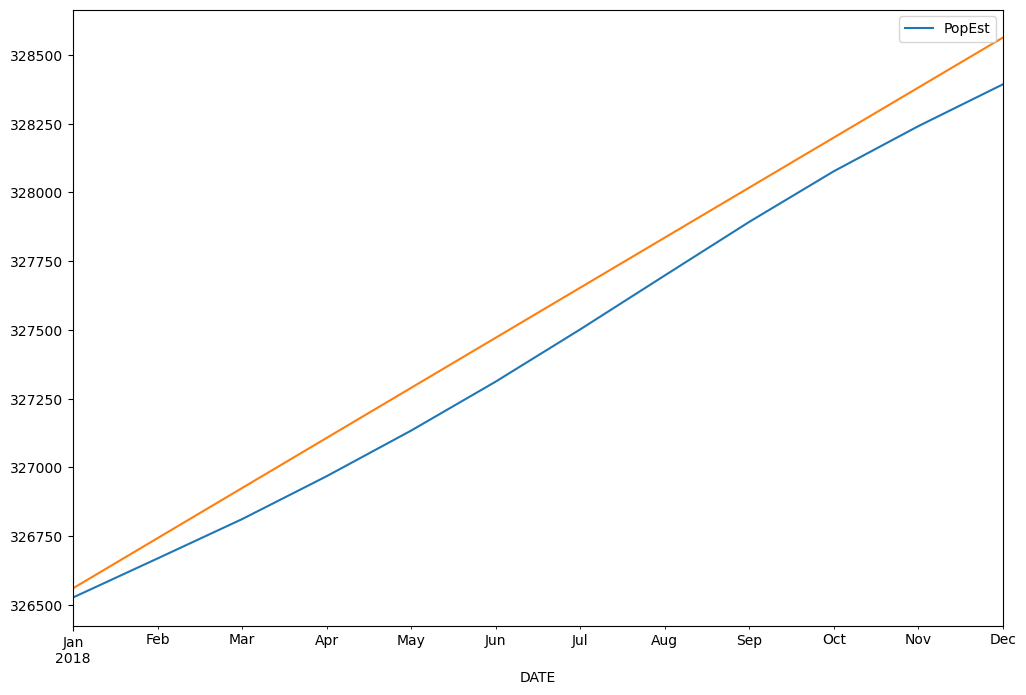

In [128]:
test_data.plot()
pred1.plot()

In [129]:
model = AutoReg(train_data['PopEst'], lags=2)
AR2fit = model.fit() 

In [130]:
AR2fit.params

const        137.368305
PopEst.L1      1.853490
PopEst.L2     -0.853836
dtype: float64

In [131]:
pred2 = AR2fit.predict(start=start, end=end)

In [132]:
pred2 = pred2.rename('AR(2) Predictions')

<Axes: xlabel='DATE'>

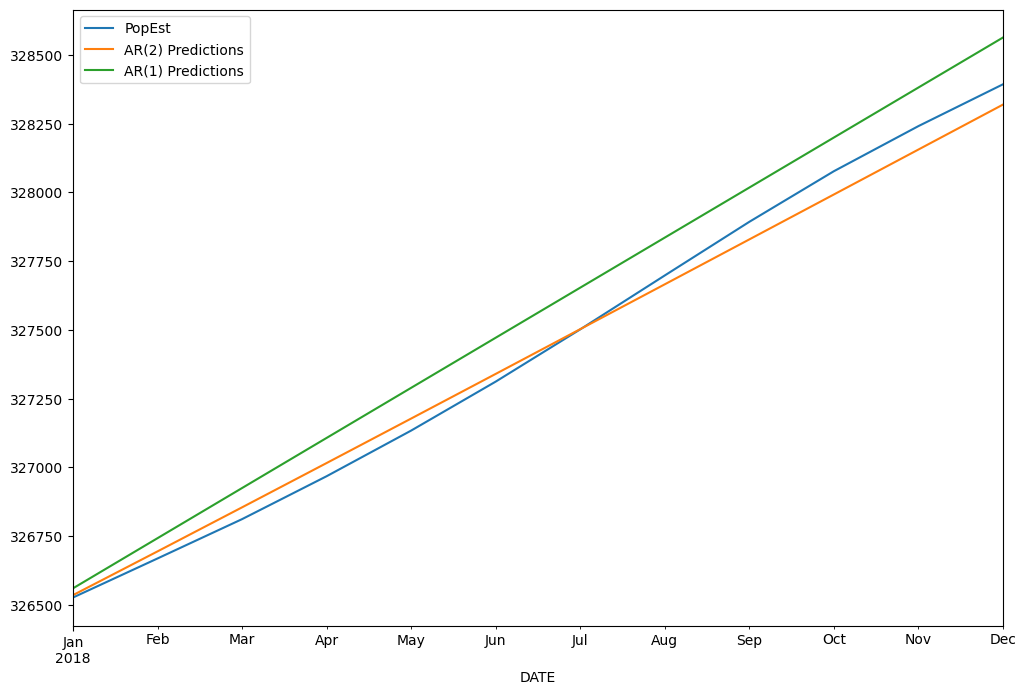

In [133]:
test_data.plot(legend=True)
pred2.plot(legend=True)
pred1.plot(legend=True)

In [134]:
model = AutoReg(train_data['PopEst'], lags=8)
AR8fit = model.fit() 

In [135]:
pred8 = AR8fit.predict(start=start, end=end)

In [136]:
pred8 = pred8.rename('AR(8) Predictions')

In [137]:
from sklearn.metrics import mean_squared_error

In [138]:
labels = ['AR1', 'AR2', 'AR8']

In [139]:
preds = [pred1, pred2, pred8]
pred8

2018-01-01    326523.865562
2018-02-01    326662.772580
2018-03-01    326805.746894
2018-04-01    326960.064241
2018-05-01    327130.572961
2018-06-01    327315.962813
2018-07-01    327511.010134
2018-08-01    327710.938398
2018-09-01    327907.425584
2018-10-01    328092.870818
2018-11-01    328264.133718
2018-12-01    328421.667276
Freq: MS, Name: AR(8) Predictions, dtype: float64

In [141]:
for i in range(3):
    error = mean_squared_error(test_data['PopEst'], preds[i])
    print(error)

17449.71423778315
2713.2587348537477
186.97318138876574


<Axes: xlabel='DATE'>

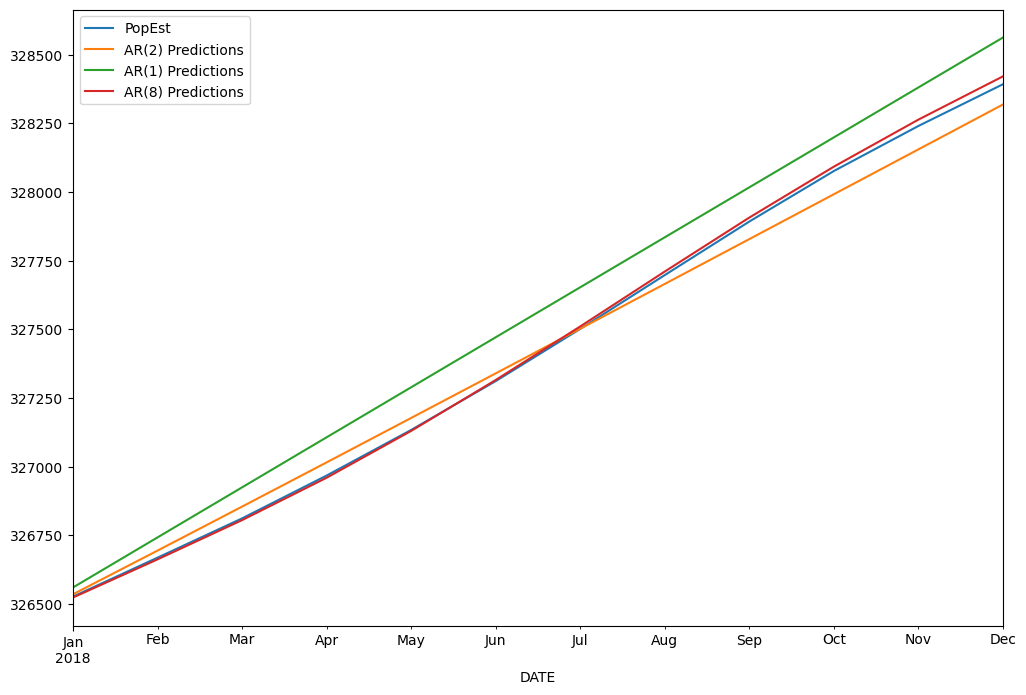

In [142]:
test_data.plot(legend=True)
pred2.plot(legend=True)
pred1.plot(legend=True)
pred8.plot(legend=True)

In [153]:
# forecasting on future data
model = AutoReg(df['PopEst'], lags=9)
ARfit = model.fit()
forecasted_values = ARfit.predict(start=len(df), end=len(df) + 248).rename('Forecast')

<Axes: xlabel='DATE'>

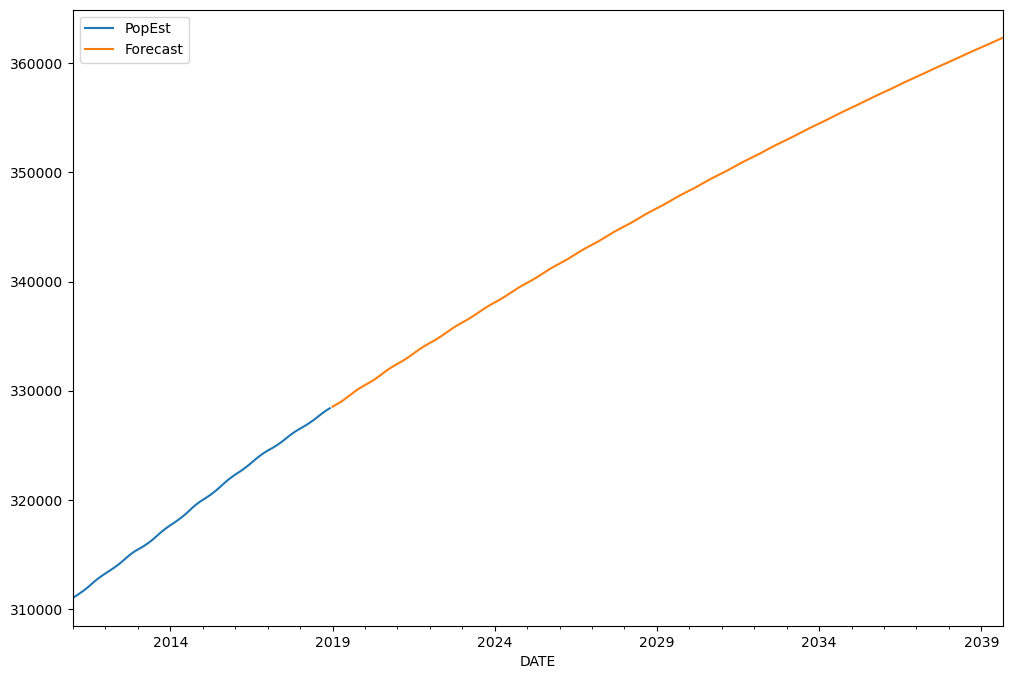

In [154]:
df['PopEst'].plot(legend=True)
forecasted_values.plot(legend=True)